## 第二章 建模仿真原理：炮弹发射的例子

一枚炮弹在海平面上方100m处的悬崖上以水平500m/s的速度射出，问题是：炮弹将落到距离悬崖多远的地方？将在空中飞行多长时间？
$$v={\int}g\,{\rm d}t=gt+v_0$$
$$p={\int}v\,{\rm d}t={1\over2}gt^2+v_0t+p_0$$
假设$v_0=0$、$p_0=100m$，那么
$$t=\sqrt{2p\over g}=\sqrt{200\over9.81}=4.52\,s$$
考虑加速度的水平分量，则：
$$v={\int}a\,{\rm d}t=v_0$$
$$p={\int}v\,{\rm d}t=v_0t+p_0$$
式中，$a$为炮弹离开炮管后的加速度，因为无外力作用，所以$a=0$，$v_0=500m/s$，$p_0$可以设为零，因此可以计算炮弹溅落点到悬崖的水平距离：
$$p=v_0t=500\times4.52=2260\,m$$

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

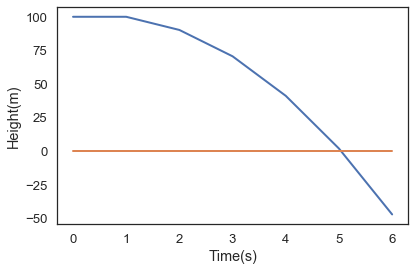

In [2]:
m = UNITS.meter
s = UNITS.second

g = 9.8 * m/s**2

init_z = State(y=100.0 * m, v=0.0 * m/s)
init_x = State(y=0.0 * m, v=500.0 * m/s)

t_end = 6 * s
dt = 1 * s

system_z = System(init=init_z, g=g, t_end=t_end, dt=dt)
system_x = System(init=init_x, t_end=t_end, dt=dt)

def slope_func_z(state, t, system):
    y, v = state
    
    dydt = v
    dvdt = -system.g
    
    return dydt, dvdt

def slope_func_x(state, t, system):
    y, v = state
    
    dydt = v
    dvdt = 0.0 * m/s**2
    
    return dydt, dvdt

Vz, Az = slope_func_z(system_z.init, 0, system_z)
Vx, Ax = slope_func_x(system_x.init, 0, system_x)

results_z, details_z = run_euler(system_z, slope_func_z)
results_x, details_x = run_euler(system_x, slope_func_x)

plot(results_z.y)
decorate(xlabel='Time(s)',
         ylabel='Height(m)')

x=[0,1,2,3,4,5,6]
y=[0,0,0,0,0,0,0]
plot(x,y)

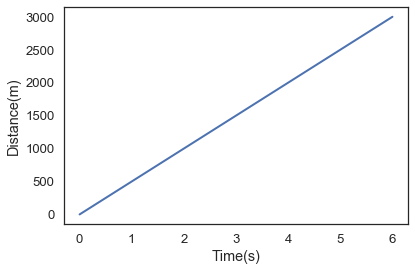

In [3]:
plot(results_x.y)
decorate(xlabel='Time(s)',
         ylabel='Distance(m)')

### 练习
如何实现C语言程序中的，一旦Pz<0，仿真就停止的功能。